In [19]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [103]:
import pandas as pd
import numpy as np
iris_df=pd.read_csv("iris.csv")
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

In [104]:
from sklearn import preprocessing
iris_df.info()
# Bring data to one scale or standardize the dataset
print(iris_df.shape)
# separate the data from the target attributes
X_df = iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
print(X_df.head())
y_df = iris_df[["Species"]]
y=y_df
print(y_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
(152, 6)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [105]:
# missing values tritment with median of each column
X_df=X_df.fillna(X_df.median())
# standardize the data attributes
#standardized_X = preprocessing.scale(X_df)
#print(standardized_X[:10][:])
X_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [116]:
# We need to use LabelEncoder to transform them into numbers. 
# Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encode = le.fit_transform(y)
y_encode
#print(y_encode.shape)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [124]:
stardize_X_df = pd.DataFrame(X_df, columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
corr_x_df = stardize_X_df.corr()
corr_x_df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


In [125]:
#convert numpy Array to panda data frame
y_df=pd.DataFrame(y_encode, columns=["Species"])
combined_x_and_y_df = stardize_X_df
combined_x_and_y_df['Species']=y_df
combined_x_and_y_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [130]:
cor_combined_x_and_y_df = combined_x_and_y_df.corr()
cor_combined_x_and_y_df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [154]:
#Correlation with output variable
cor_target = (cor_combined_x_and_y_df["Species"])
print(cor_target)
relevant_features=cor_combined_x_and_y_df[(cor_combined_x_and_y_df["Species"] < -0.1) & (cor_combined_x_and_y_df["Species"] > 0.1)]
print("relevant_features: ", relevant_features)
# As above non of the feature are droped based on condition 

SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
Name: Species, dtype: float64
relevant_features:  Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [155]:
#This is how we apply low variance filter
combined_x_var_df = combined_x_and_y_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
combined_x_var_df.var()


SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
dtype: float64

### As the above output shows, the variance of all  compared to the other variables are significant.
### We can not drop any  column. .

## Question 6

*Plot the scatter matrix for all the variables.*

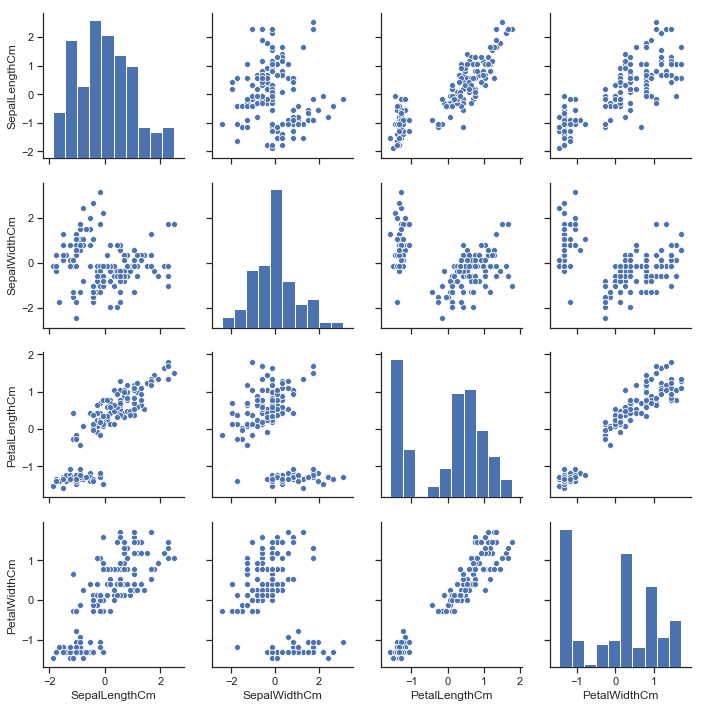

In [113]:
# for all the variable  we can use pairplot.
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
sns.pairplot(combined_x_var_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [156]:
from sklearn.model_selection import train_test_split
# train_test_split
X=combined_x_and_y_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
Y=combined_x_and_y_df[["Species"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

print(" X_train",X_train.head())
print("x_test",X_test.head())
print("y_train",y_train.head())
print("y_test",y_test.head())

 X_train      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
60             5.0           2.0            3.5           1.0
35             5.0           3.2            1.2           0.2
103            6.3           2.9            5.6           1.8
117            7.7           3.8            6.7           2.2
66             5.6           3.0            4.5           1.5
x_test      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
146            6.3           2.5            5.0           1.9
148            6.2           3.4            5.4           2.3
10             5.4           3.7            1.5           0.2
108            6.7           2.5            5.8           1.8
49             5.0           3.3            1.4           0.2
y_train      Species
60         1
35         0
103        2
117        2
66         1
y_test      Species
146        2
148        2
10         0
108        2
49         0


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

## K=3

In [192]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
print(X_test.shape)
# Instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 3)) + ' %.')


y_pred = knn.predict([[6.9,3.1,5.1,2.3],[5.0,3.4,1.5,0.2]])
print(y_pred)
le.inverse_transform([2,0])


(31, 4)
Confusion Matrix
 [[ 8  0  0]
 [ 0 12  1]
 [ 0  1  9]]
Accuracy of our model is equal 93.548 %.
[2 0]


array(['Iris-virginica', 'Iris-setosa'], dtype=object)

## K=5


In [14]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=7)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 3)) + ' %.')
y_pred = knn.predict([[5.9,3.0,5.1,1.8]])
y_pred

Confusion Matrix
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]
Accuracy of our model is equal 100.0 %.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


array([2])

## K=9

In [15]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k =9)
knn = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 3)) + ' %.')
y_pred = knn.predict([[6.5,2.8,4.6,1.5]])
y_pred

Confusion Matrix
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  8]]
Accuracy of our model is equal 96.774 %.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


array([2])

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [16]:
# creating odd list of K for KNN
myList = list(range(1,20))
#for k in myList:
#    print(k)
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
#for k in neighbors:
#    print(k)
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [17]:
neighbors_list=[]
neighbors = filter(lambda x: x % 2 != 0, myList)
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE)
for k in neighbors:
    neighbors_list.append(k)
MSE_MIN=min(MSE)
print(MSE_MIN)
MSE_MIN_IDX=MSE.index(min(MSE))
print(MSE_MIN_IDX)
print(neighbors_list)
# determining best k
optimal_k = neighbors_list[MSE_MIN_IDX]
print ("The optimal number of neighbors is %d" % optimal_k)


[0.09428904428904428, 0.09428904428904428, 0.06637529137529152, 0.05868298368298375, 0.06701631701631694, 0.06637529137529141, 0.0747086247086246, 0.08240093240093249, 0.08100233100233112, 0.07395104895104898]
0.05868298368298375
3
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
The optimal number of neighbors is 7


In [18]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

NameError: name 'plt' is not defined

## As above
#### Training accuracy rises as model complexity increases
#### Testing accuracy penalizes models that are too complex or not complex enough
#### For KNN models, complexity is determined by the value of K (lower value = more complex)

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Question 11: Read the data given in bc2.csv file

In [ ]:
import pandas as pd
import numpy as np
bc2_df=pd.read_csv("bc2.csv")
bc2_df.head(10)

### Question 12: Observe the no.of records in dataset and type of each feature 

In [ ]:
bc2_df.info()

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [ ]:
bc2_df.describe()


### Check Missing Values

In [ ]:
bc2_df.isnull().values.any()


### Above does not contain missing value

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [ ]:
bc2_df.describe(include="all")


In [ ]:
bc2_df["Bare Nuclei"].unique()
bc2_df.replace('?', int(bc2_df["Bare Nuclei"].describe().top),inplace=True)
bc2_df["Bare Nuclei"].unique()

### Question 15: Find the distribution of target variable (Class) 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Get Data
Y =  bc2_df["Class"]

#Organize Data
SR_y = pd.Series(Y, name="Y (Class Vector Distribution)")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, bins=25, color="g", ax=ax)
plt.show()

#### Plot the distribution of target variable using histogram

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns


#Y.hist()

# matplotlib histogram
plt.hist(Y, color = 'blue', edgecolor = 'black',
         bins = int(180/5))


### convert the datatype of Bare Nuclei to `int`

In [ ]:
bc2_df.info()
# convert just columns "Bare Nuclei"
bc2_df[["Bare Nuclei"]] = bc2_df[["Bare Nuclei"]].apply(pd.to_numeric)


### Question 16: Standardization of Data

In [ ]:
names=bc2_df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
X_df=bc2_df.drop(["ID","Class"],axis=1)
Y_df=bc2_df[["Class"]]

print("Y: \n ",Y_df.head())

st_x_df = scaler.fit_transform(X_df)
col_name=names[:][1:10]
st_x_df
stardize_X_df = pd.DataFrame(st_x_df, columns=col_name)
stardize_X_df.head()

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [ ]:
#stardize_X_df.corr()
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(stardize_X_df)

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = stardize_X_df.corr()
#Remove the column with high Corelation
print("Matrix: ")
corr_matrix



In [ ]:
# Droping the column which have higher vale which is I am considering morethan .9 which is higher 
# corelated with ("Cell Shape" and "Cell Size")
# this process will continue for all the feature
new_matrix=stardize_X_df.drop("Cell Size",axis=1)
new_matrix.head()
# Create correlation matrix
corr_matrix1 = new_matrix.corr()
corr_matrix1


# Now as above we can see non of the value is more that .9 so we no need to delete

### Question 18: Divide the dataset into feature set and target set

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split
seature_set=stardize_X_df
target_set=Y_df
print("feature set \n ",seature_set.head())
print("target set \n ",target_set.head())


### Divide the Training and Test sets in 70:30 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(seature_set, target_set, test_size = 0.3, random_state = 1)

print(" X_train \n ",X_train.head())
print("x_test \n ",X_test.head())
print("y_train \n ",y_train.head())
print("y_test\n ",y_test.head())

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [ ]:
# creating odd list of K for KNN
myList = list(range(1,20))
#for k in myList:
#    print(k)
# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
#for k in neighbors:
#    print(k)
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
neighbors_list=[]
neighbors = filter(lambda x: x % 2 != 0, myList)
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
print(MSE)
for k in neighbors:
    neighbors_list.append(k)
MSE_MIN=min(MSE)
print(MSE_MIN)
MSE_MIN_IDX=MSE.index(min(MSE))
print(MSE_MIN_IDX)
print(neighbors_list)
# determining best k
optimal_k = neighbors_list[MSE_MIN_IDX]
print ("The optimal number of neighbors is %d" % optimal_k)

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Question 20: Print the optimal number of neighbors

In [ ]:
print ("The optimal number of neighbors is %d" % optimal_k)